In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD

# Cropping the Face

In [4]:
def crop_face(img,detect):
    for (x,y,w,h) in detect:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
        img = img[y:y + h, x:x + w]
    return img

# Detecting the Face

In [6]:
def face_detect(readpath):
    img = cv2.imread(readpath)
    #usnig haarcascade function to detect face
    haar_cascade_face = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    detect=haar_cascade_face.detectMultiScale(img, scaleFactor = 1.2, minNeighbors = 5)
    #cropping the imge
    img = crop_face(img,detect)
    return img

# Testing Haar cascade face detect and cropping

newdata/kushagr-samples/0.jpg


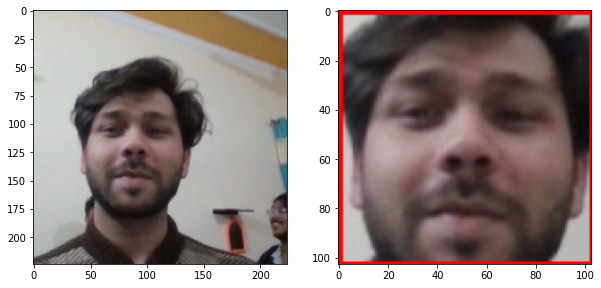

In [34]:
fig = plt.figure(figsize=(10, 7))
  
rows = 1
columns = 2


y= "0.jpg"
readpath = str("newdata/"+"kushagr-samples"+"/"+y)
img = cv2.imread(readpath)
fig.add_subplot(rows, columns, 1)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)
cropped_face = face_detect(readpath)
cropped_face =cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB)
fig.add_subplot(rows, columns, 2)
plt.imshow(cropped_face)
print(readpath)

# Giving Numbers to Classes

In [27]:
li = list(os.listdir("newdata"))
d= dict();
for i in range(0,len(li)):
    d[i] = li[i]
print(d)

{0: 'Affan-samples', 1: 'aryan-samples', 2: 'keshav-samples', 3: 'kushagr-samples', 4: 'rishi-samples', 5: 'shubh-samples'}


# Making New Directory having Cropped Photos

In [41]:
os.mkdir("empty_faces")
for i in range(len(os.listdir("newdata"))):
    os.mkdir("empty_faces/"+d[i])
   

In [42]:
dirlst = os.listdir("newdata")
for i in range(len(dirlst)):
    iif = os.listdir("newdata/"+dirlst[i])
    for j in iif:
        readpath = "newdata/"+dirlst[i]+"/"+j
        cropped_face = face_detect(readpath)
        cv2.imwrite("empty_faces/"+dirlst[i]+"/"+j,cropped_face)

In [49]:
dirlst=os.listdir("empty_faces")
imag=[]
lable=[]
for i in range(len(dirlst)):
    iop=os.listdir("empty_faces/"+dirlst[i])#images in folder
    for y in iop:
        #print("newdata/"+dirlst[i]+"/"+y)
        img=cv2.imread("empty_faces/"+dirlst[i]+"/"+y)
        img=cv2.resize(img,(224,224),interpolation=cv2.INTER_NEAREST)
        imag.append(img)
        lable.append(i)

In [50]:
lable

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [51]:
imag = np.asarray(imag, dtype="float") / 255.0
labels = np.array(lable)

In [54]:
(trainX, testX, trainY, testY) = train_test_split(imag,labels, test_size=0.25, random_state=42)

In [56]:
from tensorflow.keras.utils import to_categorical
trainY = to_categorical(trainY, num_classes=6)
testY = to_categorical(testY, num_classes=6)

In [83]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32,(5,5),activation = 'leaky_relu',input_shape = (224,224,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #

                                    tf.keras.layers.Conv2D(64,(5,5),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    

                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                                           
                                    tf.keras.layers.Flatten(),
                                    #
                                    
                                    tf.keras.layers.Dense(36,activation = 'relu'),
                                    #
                                    
                                    #
                                    tf.keras.layers.Dense(6,activation = 'softmax')
                                    
                                    ])

In [86]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [88]:
from tensorflow.keras import callbacks
early_stopping=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min')
filepath="main_model.h5"
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [early_stopping,checkpoint]

In [89]:
model.fit(trainX, trainY,shuffle=True,
          batch_size=32,
          epochs=50,
          verbose=1,validation_data=(testX, testY),callbacks=callbacks_list)

Epoch 1/50
20/20 [==============================] - ETA: 0s - loss: 0.1360 - accuracy: 0.2476
Epoch 00001: val_loss improved from inf to 0.13611, saving model to main_model.h5
20/20 [==============================] - 45s 2s/step - loss: 0.1360 - accuracy: 0.2476 - val_loss: 0.1361 - val_accuracy: 0.1952
Epoch 2/50
20/20 [==============================] - ETA: 0s - loss: 0.1349 - accuracy: 0.2460
Epoch 00002: val_loss improved from 0.13611 to 0.13506, saving model to main_model.h5
20/20 [==============================] - 45s 2s/step - loss: 0.1349 - accuracy: 0.2460 - val_loss: 0.1351 - val_accuracy: 0.1952
Epoch 3/50
20/20 [==============================] - ETA: 0s - loss: 0.1337 - accuracy: 0.2413
Epoch 00003: val_loss improved from 0.13506 to 0.13369, saving model to main_model.h5
20/20 [==============================] - 44s 2s/step - loss: 0.1337 - accuracy: 0.2413 - val_loss: 0.1337 - val_accuracy: 0.2238
Epoch 4/50
20/20 [==============================] - ETA: 0s - loss: 0.1322 - 

KeyboardInterrupt: 

In [90]:
from keras.models import load_model
model = load_model('main_model.h5')
score = model.evaluate(testX, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03944948688149452
Test accuracy: 0.9285714030265808


In [100]:
vid = cv2.VideoCapture(0)
while(True):
   ret, frame = vid.read()
 
   cv2.imshow('frame', frame)  
   if cv2.waitKey(1) & 0xFF == ord('q'):
       frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
       cv2.imwrite("img.jpg",frame)
       break
vid.release()
cv2.destroyAllWindows()

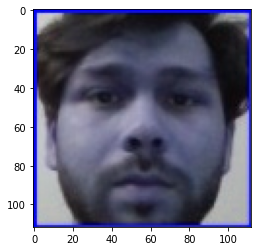

In [122]:
x= cv2.imread("102.jpg")
plt.imshow(x)

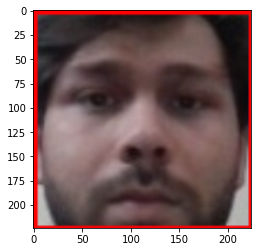

In [124]:
x = face_detect("102.jpg")
x=cv2.resize(x,(224,224))
x = cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
plt.imshow(x)

In [125]:
x=cv2.resize(x,(224,224),interpolation=cv2.INTER_NEAREST)
x = np.asarray(x, dtype="float") / 255.0
x= np.expand_dims(x,axis = 0)
x = np.vstack([x])

In [126]:
val =model.predict(x)

In [127]:
val

array([[0.01925475, 0.0246834 , 0.10111305, 0.75937957, 0.08146568,
        0.01410359]], dtype=float32)

In [128]:
np.argmax(val, axis=-1)

array([3], dtype=int64)